## Exploring Fake and Real News CSV files¶

See create_model.ipynb for model created using all data. Model was still > 100 MB and not able to be saved on GitHub.

In [1]:
# Add installations as needed
# !pip install pandas
# !pip install sklearn

#### Fake News Detection Datasets from University of Victoria Engineering  
https://www.uvic.ca/engineering/ece/isot/datasets/fake-news/index.php

Datasets available include one CSV file of truthful articles from reliable news sites and another CSV file with articles from sites flagged as unreliable by https://www.politifact.com/

### Reading in the CSV files as dataframes

In [5]:
# Set up dependencies and read in csv files
import os
import pandas as pd

In [6]:
fake_news_path = os.path.join("..","Data", "fake.csv")
fake_news_path

'..\\Data\\fake.csv'

In [7]:
fake_df = pd.read_csv(fake_news_path)
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [9]:
# Due to original model size > 100 MB, drop now a chunk of the rows of articles (for fake, dropping 3400 articles)
fake_df_reduced = fake_df.drop(fake_df.index[0:3400])
fake_df_reduced

,title,text,subject,date
3400,Trump DESPERATE For Celebrities To Perform At...,While his major qualification to be President ...,News,"December 15, 2016"
3401,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,"December 14, 2016"
3402,Ann Coulter Thinks We Need To Get Rid Of The ...,Conservative political analyst (and all around...,News,"December 14, 2016"
3403,WATCH: Celebrities Unite To Send POWERFUL Mes...,December 19th could be the day 38 electors ste...,News,"December 14, 2016"
3404,Judge Orders Trump To Court In Early January;...,One of Donald Trump s main tools as a business...,News,"December 14, 2016"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [10]:
true_path = os.path.join("..","Data", "true.csv")
true_path

'..\\Data\\true.csv'

In [11]:
true_df = pd.read_csv(true_path)
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [12]:
# Due to original model size > 100 MB, drop now a chunk of the rows of articles (for true, dropping 3400 articles)
true_df_reduced = true_df.drop(true_df.index[0:3400])
true_df_reduced

,title,text,subject,date
3400,Comey to be pressed on whether Trump interfere...,WASHINGTON (Reuters) - Former FBI Director Jam...,politicsNews,"June 4, 2017"
3401,Trump criticized for tweet on London mayor aft...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 4, 2017"
3402,Deutsche Bank ignores U.S. Trump/Russia query:...,FRANKFURT (Reuters) - Germany’s largest bank h...,politicsNews,"June 4, 2017"
3403,Putin's dinner with Michael Flynn: 'I didn't e...,MOSCOW (Reuters) - Russian President Vladimir ...,politicsNews,"June 4, 2017"
3404,Trump responds to UK attack with apparent crit...,LONDON (Reuters) - U.S. President Donald Trump...,politicsNews,"June 4, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


### Prepare dataframes for train_test_split and models
* Insert a column for each dataframe identifying if fake or real news
* Insert a coded column, with 0 values for fake news and 1 values for real news
* Combine the two dataframes to one, for train_test_split

In [13]:
fake_df_reduced.insert(0, 'news_type', 'fake')
fake_df_reduced

,news_type,title,text,subject,date
3400,fake,Trump DESPERATE For Celebrities To Perform At...,While his major qualification to be President ...,News,"December 15, 2016"
3401,fake,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,"December 14, 2016"
3402,fake,Ann Coulter Thinks We Need To Get Rid Of The ...,Conservative political analyst (and all around...,News,"December 14, 2016"
3403,fake,WATCH: Celebrities Unite To Send POWERFUL Mes...,December 19th could be the day 38 electors ste...,News,"December 14, 2016"
3404,fake,Judge Orders Trump To Court In Early January;...,One of Donald Trump s main tools as a business...,News,"December 14, 2016"
...,...,...,...,...,...
23476,fake,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,fake,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,fake,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,fake,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [14]:
# Drop any rows and columns with null values
fake_df_reduced.dropna(inplace=True)
fake_df_reduced

,news_type,title,text,subject,date
3400,fake,Trump DESPERATE For Celebrities To Perform At...,While his major qualification to be President ...,News,"December 15, 2016"
3401,fake,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,"December 14, 2016"
3402,fake,Ann Coulter Thinks We Need To Get Rid Of The ...,Conservative political analyst (and all around...,News,"December 14, 2016"
3403,fake,WATCH: Celebrities Unite To Send POWERFUL Mes...,December 19th could be the day 38 electors ste...,News,"December 14, 2016"
3404,fake,Judge Orders Trump To Court In Early January;...,One of Donald Trump s main tools as a business...,News,"December 14, 2016"
...,...,...,...,...,...
23476,fake,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,fake,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,fake,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,fake,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [15]:
true_df_reduced.insert(0, 'news_type', 'true')
true_df_reduced

,news_type,title,text,subject,date
3400,true,Comey to be pressed on whether Trump interfere...,WASHINGTON (Reuters) - Former FBI Director Jam...,politicsNews,"June 4, 2017"
3401,true,Trump criticized for tweet on London mayor aft...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 4, 2017"
3402,true,Deutsche Bank ignores U.S. Trump/Russia query:...,FRANKFURT (Reuters) - Germany’s largest bank h...,politicsNews,"June 4, 2017"
3403,true,Putin's dinner with Michael Flynn: 'I didn't e...,MOSCOW (Reuters) - Russian President Vladimir ...,politicsNews,"June 4, 2017"
3404,true,Trump responds to UK attack with apparent crit...,LONDON (Reuters) - U.S. President Donald Trump...,politicsNews,"June 4, 2017"
...,...,...,...,...,...
21412,true,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,true,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,true,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,true,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [16]:
# Break the text column into two, adding new column to only view what was after the hyphen
true_df_reduced['text_split'] = true_df_reduced['text'].str.split(' - ', expand=False).str[1]
true_df_reduced
# using '-' also split anywhere there was a hyphen which was not intended

,news_type,title,text,subject,date,text_split
3400,true,Comey to be pressed on whether Trump interfere...,WASHINGTON (Reuters) - Former FBI Director Jam...,politicsNews,"June 4, 2017",Former FBI Director James Comey will be grille...
3401,true,Trump criticized for tweet on London mayor aft...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 4, 2017",U.S. President Donald Trump came under fire on...
3402,true,Deutsche Bank ignores U.S. Trump/Russia query:...,FRANKFURT (Reuters) - Germany’s largest bank h...,politicsNews,"June 4, 2017",Germany’s largest bank has failed to respond t...
3403,true,Putin's dinner with Michael Flynn: 'I didn't e...,MOSCOW (Reuters) - Russian President Vladimir ...,politicsNews,"June 4, 2017",Russian President Vladimir Putin hardly spoke ...
3404,true,Trump responds to UK attack with apparent crit...,LONDON (Reuters) - U.S. President Donald Trump...,politicsNews,"June 4, 2017",U.S. President Donald Trump tweeted on Sunday ...
...,...,...,...,...,...,...
21412,true,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",NATO allies on Tuesday welcomed President Dona...
21413,true,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017","LexisNexis, a provider of legal, regulatory an..."
21414,true,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",In the shadow of disused Soviet-era factories ...
21415,true,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Vatican Secretary of State Cardinal Pietro Par...


In [17]:
# Remove the column that identifies the source
true_cleaned_df = true_df_reduced.drop('text', inplace=False, axis=1)

In [18]:
# Rename the final column as text, to match the fake news data
true_renamed_df = true_cleaned_df.rename(columns={"text_split" : "text"})
true_renamed_df

,news_type,title,subject,date,text
3400,true,Comey to be pressed on whether Trump interfere...,politicsNews,"June 4, 2017",Former FBI Director James Comey will be grille...
3401,true,Trump criticized for tweet on London mayor aft...,politicsNews,"June 4, 2017",U.S. President Donald Trump came under fire on...
3402,true,Deutsche Bank ignores U.S. Trump/Russia query:...,politicsNews,"June 4, 2017",Germany’s largest bank has failed to respond t...
3403,true,Putin's dinner with Michael Flynn: 'I didn't e...,politicsNews,"June 4, 2017",Russian President Vladimir Putin hardly spoke ...
3404,true,Trump responds to UK attack with apparent crit...,politicsNews,"June 4, 2017",U.S. President Donald Trump tweeted on Sunday ...
...,...,...,...,...,...
21412,true,'Fully committed' NATO backs new U.S. approach...,worldnews,"August 22, 2017",NATO allies on Tuesday welcomed President Dona...
21413,true,LexisNexis withdrew two products from Chinese ...,worldnews,"August 22, 2017","LexisNexis, a provider of legal, regulatory an..."
21414,true,Minsk cultural hub becomes haven from authorities,worldnews,"August 22, 2017",In the shadow of disused Soviet-era factories ...
21415,true,Vatican upbeat on possibility of Pope Francis ...,worldnews,"August 22, 2017",Vatican Secretary of State Cardinal Pietro Par...


In [19]:
# Drop any rows and columns with null values
true_renamed_df.dropna(inplace=True)
true_renamed_df

,news_type,title,subject,date,text
3400,true,Comey to be pressed on whether Trump interfere...,politicsNews,"June 4, 2017",Former FBI Director James Comey will be grille...
3401,true,Trump criticized for tweet on London mayor aft...,politicsNews,"June 4, 2017",U.S. President Donald Trump came under fire on...
3402,true,Deutsche Bank ignores U.S. Trump/Russia query:...,politicsNews,"June 4, 2017",Germany’s largest bank has failed to respond t...
3403,true,Putin's dinner with Michael Flynn: 'I didn't e...,politicsNews,"June 4, 2017",Russian President Vladimir Putin hardly spoke ...
3404,true,Trump responds to UK attack with apparent crit...,politicsNews,"June 4, 2017",U.S. President Donald Trump tweeted on Sunday ...
...,...,...,...,...,...
21412,true,'Fully committed' NATO backs new U.S. approach...,worldnews,"August 22, 2017",NATO allies on Tuesday welcomed President Dona...
21413,true,LexisNexis withdrew two products from Chinese ...,worldnews,"August 22, 2017","LexisNexis, a provider of legal, regulatory an..."
21414,true,Minsk cultural hub becomes haven from authorities,worldnews,"August 22, 2017",In the shadow of disused Soviet-era factories ...
21415,true,Vatican upbeat on possibility of Pope Francis ...,worldnews,"August 22, 2017",Vatican Secretary of State Cardinal Pietro Par...


In [20]:
all_news_df = pd.concat((fake_df_reduced, true_renamed_df), axis=0)
all_news_df

,news_type,title,text,subject,date
3400,fake,Trump DESPERATE For Celebrities To Perform At...,While his major qualification to be President ...,News,"December 15, 2016"
3401,fake,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,"December 14, 2016"
3402,fake,Ann Coulter Thinks We Need To Get Rid Of The ...,Conservative political analyst (and all around...,News,"December 14, 2016"
3403,fake,WATCH: Celebrities Unite To Send POWERFUL Mes...,December 19th could be the day 38 electors ste...,News,"December 14, 2016"
3404,fake,Judge Orders Trump To Court In Early January;...,One of Donald Trump s main tools as a business...,News,"December 14, 2016"
...,...,...,...,...,...
21412,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
21413,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
21414,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
21415,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [21]:
# Drop any rows and columns with null values
all_news_df.dropna(inplace=True)
all_news_df

,news_type,title,text,subject,date
3400,fake,Trump DESPERATE For Celebrities To Perform At...,While his major qualification to be President ...,News,"December 15, 2016"
3401,fake,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,"December 14, 2016"
3402,fake,Ann Coulter Thinks We Need To Get Rid Of The ...,Conservative political analyst (and all around...,News,"December 14, 2016"
3403,fake,WATCH: Celebrities Unite To Send POWERFUL Mes...,December 19th could be the day 38 electors ste...,News,"December 14, 2016"
3404,fake,Judge Orders Trump To Court In Early January;...,One of Donald Trump s main tools as a business...,News,"December 14, 2016"
...,...,...,...,...,...
21412,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
21413,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
21414,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
21415,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [22]:
# Once a CSV file was saved of the data additional issues were seen
# Some text results only contain spaces (no contents, although not null)
one_space_text_df = all_news_df[all_news_df.text == ' ']
one_space_text_df

,news_type,title,text,subject,date
10923,fake,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,fake,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,fake,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,fake,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,fake,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...,...
21816,fake,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,fake,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,fake,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,fake,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [23]:
# Removing rows with text including only " "
all_news_cleaned_df = all_news_df[all_news_df.text != " "]
all_news_cleaned_df

,news_type,title,text,subject,date
3400,fake,Trump DESPERATE For Celebrities To Perform At...,While his major qualification to be President ...,News,"December 15, 2016"
3401,fake,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,"December 14, 2016"
3402,fake,Ann Coulter Thinks We Need To Get Rid Of The ...,Conservative political analyst (and all around...,News,"December 14, 2016"
3403,fake,WATCH: Celebrities Unite To Send POWERFUL Mes...,December 19th could be the day 38 electors ste...,News,"December 14, 2016"
3404,fake,Judge Orders Trump To Court In Early January;...,One of Donald Trump s main tools as a business...,News,"December 14, 2016"
...,...,...,...,...,...
21412,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
21413,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
21414,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
21415,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [24]:
# More to clean, text with '  '
two_space_text_df = all_news_df[all_news_df.text == '  ']
two_space_text_df

,news_type,title,text,subject,date
12244,fake,TRUMP SLAMS THE GLOBALISTS: “There is no globa...,,politics,"Dec 1, 2016"
12654,fake,TRUMP SUPPORTERS In Virginia Beach Shout Down ...,,politics,"Oct 22, 2016"
16306,fake,TRUMP SLAMS THE GLOBALISTS: “There is no globa...,,Government News,"Dec 1, 2016"
19756,fake,TRUMP SUPPORTERS In Virginia Beach Shout Down ...,,left-news,"Oct 22, 2016"


In [25]:
all_news_next_df = all_news_cleaned_df[all_news_cleaned_df.text != "  "]
all_news_next_df

,news_type,title,text,subject,date
3400,fake,Trump DESPERATE For Celebrities To Perform At...,While his major qualification to be President ...,News,"December 15, 2016"
3401,fake,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,"December 14, 2016"
3402,fake,Ann Coulter Thinks We Need To Get Rid Of The ...,Conservative political analyst (and all around...,News,"December 14, 2016"
3403,fake,WATCH: Celebrities Unite To Send POWERFUL Mes...,December 19th could be the day 38 electors ste...,News,"December 14, 2016"
3404,fake,Judge Orders Trump To Court In Early January;...,One of Donald Trump s main tools as a business...,News,"December 14, 2016"
...,...,...,...,...,...
21412,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
21413,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
21414,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
21415,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [26]:
# Can stop at three spaces (no results)
three_space_text_df = all_news_df[all_news_df.text == '   ']
three_space_text_df

,news_type,title,text,subject,date


In [27]:
# Another issue seen in the CSV file, rows that only include "fed up" links
bad_rows_df = all_news_df[all_news_df.text == all_news_df.title]
bad_rows_df

,news_type,title,text,subject,date
9358,fake,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...
15507,fake,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...
15508,fake,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...
15839,fake,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...
15840,fake,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...
17432,fake,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...
17433,fake,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...
21869,fake,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...
21870,fake,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...


In [28]:
all_news_final_df = all_news_next_df[all_news_next_df.text != all_news_next_df.title]
all_news_final_df

,news_type,title,text,subject,date
3400,fake,Trump DESPERATE For Celebrities To Perform At...,While his major qualification to be President ...,News,"December 15, 2016"
3401,fake,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,"December 14, 2016"
3402,fake,Ann Coulter Thinks We Need To Get Rid Of The ...,Conservative political analyst (and all around...,News,"December 14, 2016"
3403,fake,WATCH: Celebrities Unite To Send POWERFUL Mes...,December 19th could be the day 38 electors ste...,News,"December 14, 2016"
3404,fake,Judge Orders Trump To Court In Early January;...,One of Donald Trump s main tools as a business...,News,"December 14, 2016"
...,...,...,...,...,...
21412,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
21413,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
21414,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
21415,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [29]:
all_news_cleaned_df = all_news_final_df[(all_news_final_df.news_type == 'true') | (all_news_final_df.news_type == 'fake')]
all_news_cleaned_df

,news_type,title,text,subject,date
3400,fake,Trump DESPERATE For Celebrities To Perform At...,While his major qualification to be President ...,News,"December 15, 2016"
3401,fake,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,"December 14, 2016"
3402,fake,Ann Coulter Thinks We Need To Get Rid Of The ...,Conservative political analyst (and all around...,News,"December 14, 2016"
3403,fake,WATCH: Celebrities Unite To Send POWERFUL Mes...,December 19th could be the day 38 electors ste...,News,"December 14, 2016"
3404,fake,Judge Orders Trump To Court In Early January;...,One of Donald Trump s main tools as a business...,News,"December 14, 2016"
...,...,...,...,...,...
21412,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
21413,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
21414,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
21415,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [30]:
all_news_cleaned_df.drop_duplicates()
all_news_cleaned_df.count()

news_type    37431
title        37431
text         37431
subject      37431
date         37431
dtype: int64

In [31]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'news_type'. 
all_news_cleaned_df['news_code']= label_encoder.fit_transform(all_news_cleaned_df['news_type']) 
print(all_news_cleaned_df.head())

     news_type                                              title  \
3400      fake   Trump DESPERATE For Celebrities To Perform At...   
3401      fake   BREAKING: Putin Directly Orchestrated Hacks T...   
3402      fake   Ann Coulter Thinks We Need To Get Rid Of The ...   
3403      fake   WATCH: Celebrities Unite To Send POWERFUL Mes...   
3404      fake   Judge Orders Trump To Court In Early January;...   

                                                   text subject  \
3400  While his major qualification to be President ...    News   
3401  It s no secret that Russia was behind the elec...    News   
3402  Conservative political analyst (and all around...    News   
3403  December 19th could be the day 38 electors ste...    News   
3404  One of Donald Trump s main tools as a business...    News   

                   date  news_code  
3400  December 15, 2016          0  
3401  December 14, 2016          0  
3402  December 14, 2016          0  
3403  December 14, 2016          0

In [32]:
data = all_news_cleaned_df["text"]
labels = all_news_cleaned_df['news_code']

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(2,2))),
                     ('tfidf', TfidfTransformer(norm="l2", use_idf=False)),
                     ('clf', MultinomialNB(alpha=0.01))])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [34]:
text_clf.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(2, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('clf', MultinomialNB(alpha=0.01))])

In [35]:
predictions = text_clf.predict(x_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, digits=4, target_names=["fake", "true"]))

              precision    recall  f1-score   support

        fake     0.9694    0.9788    0.9741      6417
        true     0.9768    0.9666    0.9717      5936

    accuracy                         0.9730     12353
   macro avg     0.9731    0.9727    0.9729     12353
weighted avg     0.9730    0.9730    0.9730     12353



In [37]:
import joblib

In [38]:
joblib.dump(text_clf, 'model_v2.sav')

['model_v2.sav']

### model_V2.sav is a file of approximately 107 MB

In [39]:
# !pip install cloudpickle

In [40]:
import cloudpickle

In [41]:
with open("pckl_model.sav", mode="wb") as file:
  cloudpickle.dump(text_clf, file)

### pckl_model.sav is approximately 95 MB

### Word Cloud Creation

In [46]:
fake_news_for_cloud = all_news_cleaned_df[all_news_cleaned_df.news_type == 'fake']
fake_news_for_cloud

,news_type,title,text,subject,date,news_code
3400,fake,Trump DESPERATE For Celebrities To Perform At...,While his major qualification to be President ...,News,"December 15, 2016",0
3401,fake,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,"December 14, 2016",0
3402,fake,Ann Coulter Thinks We Need To Get Rid Of The ...,Conservative political analyst (and all around...,News,"December 14, 2016",0
3403,fake,WATCH: Celebrities Unite To Send POWERFUL Mes...,December 19th could be the day 38 electors ste...,News,"December 14, 2016",0
3404,fake,Judge Orders Trump To Court In Early January;...,One of Donald Trump s main tools as a business...,News,"December 14, 2016",0
...,...,...,...,...,...,...
23476,fake,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,fake,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,fake,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,fake,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [47]:
# Want to reduce to only 500 rows, starting by dropping first 14,000 results
fake_news_df = fake_news_for_cloud.drop(fake_news_for_cloud.index[0:10000])
fake_news_df

,news_type,title,text,subject,date,news_code
13772,fake,DONALD TRUMP Gives Epic Response After PGA Mov...,One thing Donald Trump is really great at is d...,politics,"Jun 2, 2016",0
13773,fake,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,politics,"Jun 2, 2016",0
13774,fake,"OBAMA BLAMES “Right Wing” Talk Radio, FOX News...",Barack only needs to find the closest mirror t...,politics,"Jun 2, 2016",0
13775,fake,CORRUPT STATE DEPARTMENT Deletes Key Info From...,This is seriously concerning! James Rosen call...,politics,"Jun 2, 2016",0
13776,fake,¡VIVA LA REVOLUTION! As Venezuela Collapses Un...,The leader of the worst economy on the planet ...,politics,"Jun 2, 2016",0
...,...,...,...,...,...,...
23476,fake,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,fake,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,fake,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,fake,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [48]:
fake_news_df_reduced = fake_news_df[fake_news_df.index < 14500]
fake_news_df_reduced

,news_type,title,text,subject,date,news_code
13772,fake,DONALD TRUMP Gives Epic Response After PGA Mov...,One thing Donald Trump is really great at is d...,politics,"Jun 2, 2016",0
13773,fake,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,politics,"Jun 2, 2016",0
13774,fake,"OBAMA BLAMES “Right Wing” Talk Radio, FOX News...",Barack only needs to find the closest mirror t...,politics,"Jun 2, 2016",0
13775,fake,CORRUPT STATE DEPARTMENT Deletes Key Info From...,This is seriously concerning! James Rosen call...,politics,"Jun 2, 2016",0
13776,fake,¡VIVA LA REVOLUTION! As Venezuela Collapses Un...,The leader of the worst economy on the planet ...,politics,"Jun 2, 2016",0
...,...,...,...,...,...,...
14495,fake,WATCH: WHY 93 YR OLD WOMAN VOTED For The First...,"First time voters, Democrats, minorities, wome...",politics,"Feb 12, 2016",0
14496,fake,MUSLIMS CRITICIZE New State Law That Permanent...,Maybe it s time for Muslim citizens and immigr...,politics,"Feb 11, 2016",0
14497,fake,DESPERATE PROGRESSIVES ARE LOSING IN GERMANY: ...,The rampant migrant rape and violence is shini...,politics,"Feb 11, 2016",0
14498,fake,FEEL THE BERN….How Hillary Walked Away From NH...,"First she won the coin toss in Iowa, and now H...",politics,"Feb 10, 2016",0


In [50]:
# !pip install wordcloud

  Using cached wordcloud-1.8.1-cp37-cp37m-win_amd64.whl (154 kB)
  Using cached matplotlib-3.4.3-cp37-cp37m-win_amd64.whl (7.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

In [52]:
# Join titles for fake news articles for creating word cloud
wordcloud_titles = " ".join(entry for entry in fake_news_df_reduced.title)

In [53]:
# Define a few extra stopwords and also add in the default list
stop_words = ['s', 'p', 'm', 'u'] + list(STOPWORDS)

In [54]:
# Set specifics of the word cloud
wordcloud = WordCloud(max_font_size=60, min_font_size=12, max_words=70, stopwords=stop_words, background_color="white").generate(wordcloud_titles)

In [55]:
from os import path

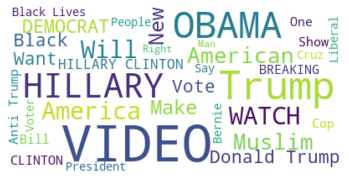

In [74]:
# Plot word cloud and save to the repo
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

fake_cloud = os.path.join("..", "static", "fake_news_cloud")
plt.savefig(fake_cloud)

plt.show()

In [69]:
true_news_for_cloud = all_news_cleaned_df[all_news_cleaned_df.news_type == 'true']
true_news_for_cloud

,news_type,title,text,subject,date,news_code
3400,true,Comey to be pressed on whether Trump interfere...,Former FBI Director James Comey will be grille...,politicsNews,"June 4, 2017",1
3401,true,Trump criticized for tweet on London mayor aft...,U.S. President Donald Trump came under fire on...,politicsNews,"June 4, 2017",1
3402,true,Deutsche Bank ignores U.S. Trump/Russia query:...,Germany’s largest bank has failed to respond t...,politicsNews,"June 4, 2017",1
3403,true,Putin's dinner with Michael Flynn: 'I didn't e...,Russian President Vladimir Putin hardly spoke ...,politicsNews,"June 4, 2017",1
3404,true,Trump responds to UK attack with apparent crit...,U.S. President Donald Trump tweeted on Sunday ...,politicsNews,"June 4, 2017",1
...,...,...,...,...,...,...
21412,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017",1
21413,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017",1
21414,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017",1
21415,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017",1


In [70]:
# Want to reduce to only about 700 rows (similar to fake news)
true_news_df_reduced = true_news_for_cloud[(true_news_for_cloud.index >= 3500) & (true_news_for_cloud.index < 4200)]
true_news_df_reduced

,news_type,title,text,subject,date,news_code
3500,true,White House says will refer questions about Ru...,The White House will said on Wednesday it woul...,politicsNews,"May 31, 2017",1
3501,true,White House declines to say if Trump has made ...,White House spokesman Sean Spicer declined on ...,politicsNews,"May 31, 2017",1
3502,true,VA chief presses Congress to make it easier to...,Veterans Affairs Secretary David Shulkin urged...,politicsNews,"May 31, 2017",1
3503,true,Comey to confirm Trump pressured him on Flynn ...,Former FBI Director James Comey plans to confi...,politicsNews,"May 31, 2017",1
3504,true,We don't know what Trump has decided on Paris ...,The German government does not know what U.S. ...,politicsNews,"May 31, 2017",1
...,...,...,...,...,...,...
4195,true,Trump orders review of visa program to encoura...,President Donald Trump on Tuesday ordered a re...,politicsNews,"April 18, 2017",1
4196,true,"U.S. consumers could suffer from Dodd-Frank, C...",Massive changes to the Consumer Financial Prot...,politicsNews,"April 19, 2017",1
4197,true,Pence reassures Japan of U.S. resolve on North...,U.S. Vice President Mike Pence reassured Japan...,politicsNews,"April 18, 2017",1
4198,true,Factbox: Trump on Twitter (April 18) - Obama a...,The weak illegal immigration policies of the O...,politicsNews,"April 18, 2017",1


In [71]:
# Join titles for true news articles for creating word cloud
wordcloud_titles_true = " ".join(entry for entry in true_news_df_reduced.title)

In [72]:
# Set specifics of the word cloud
wordcloud_true = WordCloud(max_font_size=50, min_font_size=12, max_words=80, stopwords=stop_words, background_color="white").generate(wordcloud_titles_true)

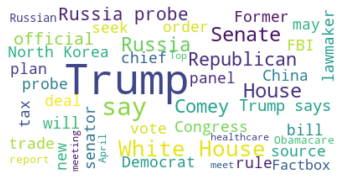

In [75]:
# Plot word cloud and save to the repo
true_cloud = plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis("off")

true_cloud = os.path.join("..", "static", "true_news_cloud")
plt.savefig(true_cloud)

plt.show()